In [1]:
import numpy as np
import matplotlib.pyplot as plt

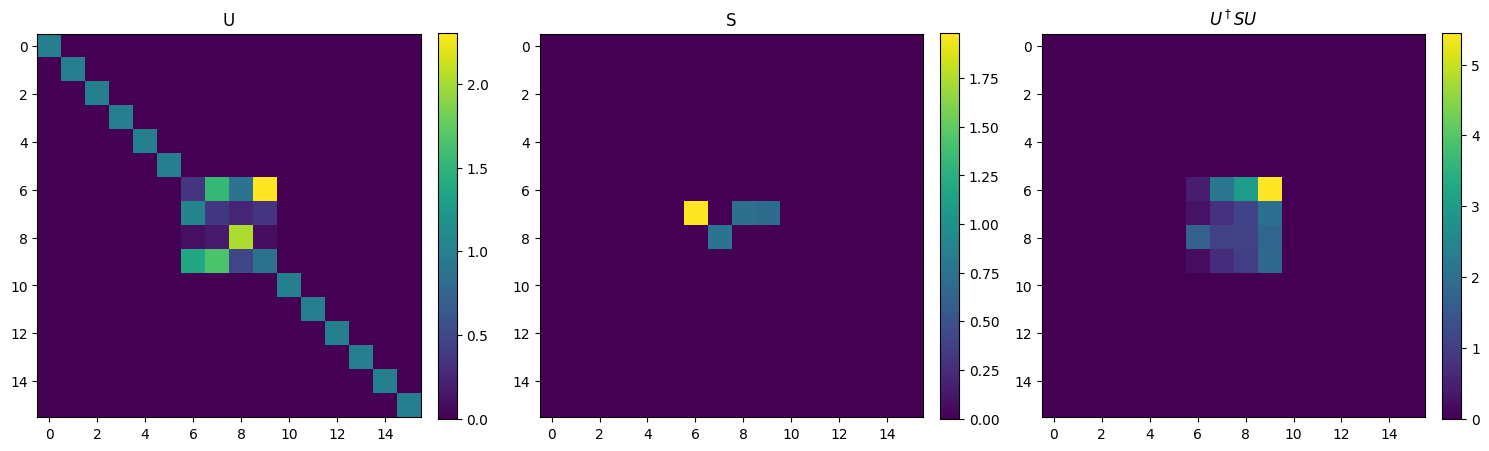

In [2]:
### Toy model
# np.random.seed(2)

n = 16
U = np.zeros((n, n), dtype=float)
S = np.zeros((n, n), dtype=float)

# -------------------
# Build S: only central 4x4 block has 4 random nonzeros elements at 4 random positions, rest is zero
# -------------------
c0, c1 = 6, 10
central_positions = [(i, j) for i in range(c0, c1) for j in range(c0, c1)]
chosen = np.random.choice(len(central_positions), size=4, replace=False)

for idx in chosen:
    i, j = central_positions[idx]
    S[i, j] = np.random.randn()

# -------------------
# Build U:
# - Identity on first 6x6 block (0..5)
# - Identity on last 6x6 block (10..15)
# - Random numbers in central 4x4 block (6..9)
# - Zero elsewhere
# -------------------
U[:6, :6] = np.eye(6)
U[10:, 10:] = np.eye(6)
U[c0:c1, c0:c1] = np.random.randn(4, 4)

# -------------------
# Compute U_dagger * S * U
# -------------------
U_dagger = U.conj().T
USU = U_dagger @ S @ U

# -------------------
# Plot
# -------------------
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = ["U", "S", r"$U^\dagger S U$"]
mats = [U, S, USU]

for ax, title, M in zip(axes, titles, mats):
    im = ax.imshow(np.abs(M), aspect="equal")
    ax.set_title(title)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()
